# Pryngles Tutorials: Developers
## Part 4 - Modules Body and System

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [2]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [4]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Core modules

## System (`system`)

`System` is probably the most important module in `Pryngles`.  Using System you will be able to create a planetary system and spangle it. You can also be able to simulate realistically the motion of the objects using Rebound. 

To create a system use:

In [59]:
sys=System()
print("Nbodies = ",sys.nbodies)
print("G constant = ",sys.sim.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

Nbodies =  0
G constant =  39.476926421373
G constant =  ['au', 'msun', 'yr']
Canonical units =  149597870700.0 1.9884754159665356e+30 31557600.0


As you can see the most important aspects of the System is set from the beginning, including the canonical units used by the system.  You can set the units using:

In [118]:
sys=System(units=["au","msun","day"])
print("G constant = ",sys.sim.G)
print("G constant = ",sys.units)
print("Canonical units = ",sys.ul,sys.um,sys.ut)

G constant =  0.00029591220828559104
G constant =  ['au', 'msun', 'day']
Canonical units =  149597870700.0 1.9884754159665356e+30 86400.0


Once a system is created you may check the status of Rebound:

In [119]:
sys.sim.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	May  7 2022 18:49:54
Number of particles: 	0
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------


At any time you may save the system:

In [120]:
sys.save_to("/tmp/system.pkl")

When pickling a system sabes two files: a `.pkl` file with the `System` object and a `.pkl.rbin` with the `Rebound` simulation.

In [121]:
!ls /tmp/system.*

/tmp/system.pkl      /tmp/system.pkl.rbin /tmp/system.py


Yo may recover a simulation using:

In [146]:
sys=System("/tmp/system.pkl")
sys.sim.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	May  7 2022 18:49:54
Number of particles: 	0
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------


Once you have created a system add particles:

In [147]:
S=sys.add(bhash="Star")
print(sys)

{'bodies': {'Star': <pryngles.body.Star object at 0x7fbe30de6370>}, 'sources': {'Star': <pryngles.body.Star object at 0x7fbe30de6370>}, 'n_obs': [0, 0, 1], 'alpha_obs': 0, 'sg': None, 'units': ['au', 'msun', 'day'], 'ul': 149597870700.0, 'um': 1.9884754159665356e+30, 'ut': 86400.0, 'nbodies': 1, 'nsources': 1, 'nparticles': 1, 'sim': <rebound.simulation.Simulation object at 0x7fbe32583d40, N=1, t=0.0>}


If you don't specify nothing a new star is added to the system.

You may update the properties of an object:

In [148]:
S.update_body(m=3,radius=0.5)
print(sys.bodies["Star"])

{'kind': 'Star', 'bhash': 'Star', 'primary': None, 'childs': {}, 'm': 3, 'x': 0, 'y': 0, 'z': 0, 'vx': 0, 'vy': 0, 'vz': 0, 'radius': 0.5, 'prot': 1, 'i': 0, 'roll': 0, 'alpha': 0, 'q0': 0, 'nspangles': 1000, 'spangle_type': 6, 'shape': 'sphere', 'geometry_args': {}, 'seed': 0, 'preset': True, 'limb_coeffs': [], 'wrot': 6.283185307179586, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00]), 'norm_limb_darkening': 3.141592653589793, 'rbhash': 'Star'}


Notice that the object has a new mass.  Now you can add new objects:

In [149]:
P=sys.add("Planet",bhash="Planet",primary=S,radius=0.1,x=1)

Notice that you need to indicate the object pointing to the primary.

In [150]:
M=sys.add("Planet",bhash="Moon",primary=P,radius=0.1,x=2,y=0.4)
R=sys.add("Ring",bhash="Ring",primary=P,fi=1.3,fe=2.3,i=20*Consts.deg)

Once you have the system defined, spangle it:

In [151]:
print(sys.nbodies,sys.nparticles,sys.nsources)

4 3 1


Again you can check the Rebound status:

In [152]:
sys.sim.status()

---------------------------------
REBOUND version:     	3.19.3
REBOUND built on:    	May  7 2022 18:49:54
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fbe32583140, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fbe32583740, m=1.0 x=1.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fbe32583140, m=1.0 x=2.0 y=0.4 z=0.0 vx=0.0 vy=0.0 vz=0.0>
---------------------------------


In [153]:
sys.spangle_system()

<IPython.core.display.Javascript object>


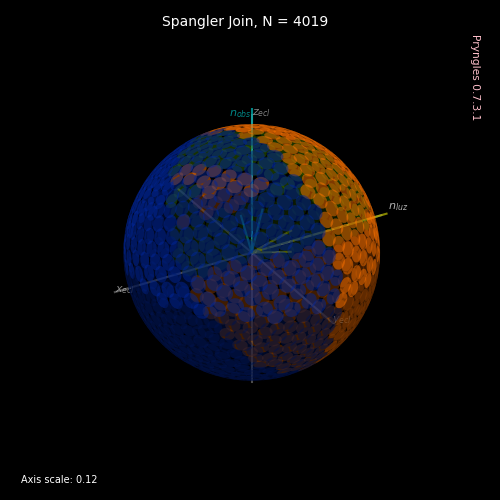

In [156]:
sys.sg.plot3d(center_at="Moon")

<IPython.core.display.Javascript object>


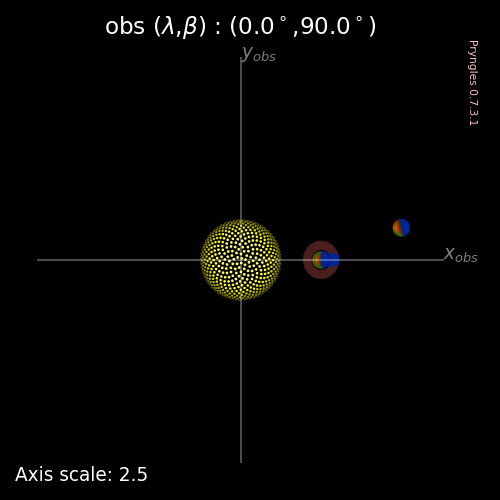

In [155]:
sys.sg.plot2d()

--- 
*The authors*, Last update: september, 2022.